In [1]:
%pylab inline
from h5py import File
from numpy import loadtxt

Populating the interactive namespace from numpy and matplotlib


In [2]:
class FancyFormatter(Formatter):
    """Formater for values with LaTeX fonts."""

    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)

    def format_data_short(self, value):
        return '{:.1f}'.format(value)

In [3]:
BFVpath = './../Output/BFV/'

#totalBFV = BFVpath+'Total/TOTAL-6params-20171104-163023.txt'
totalBFV = BFVpath+'Total/Total-6params-20171113-223947.txt'
totalJLA = BFVpath+'Total/Total-6params-JLA-20171128-170355.txt'
baoBFV = BFVpath+'BAO/BAO-6params-20171116-120539.txt'
sneBFVu21 = BFVpath+'SNe/SNe_Union2_1-6params-20171114-191728.txt'
sneBFVjla = BFVpath+'SNe/SNe_JLAbinned-6params-20171123-190120.txt'

hzBFV = BFVpath+'Hz/Hz_6params-20171116-202854.txt'

wz0b, chi2b, chi2redb, w0b, w1b, w2b, w3b, hb, ommb, bicb, aicb,mb = np.loadtxt(baoBFV)
wz0su, chi2su, chi2redsu, w0su, w1su, w2su, w3su, hsu, ommsu = np.loadtxt(sneBFVu21)
wz0sj, chi2sj, chi2redsj, w0sj, w1sj, w2sj, w3sj, hsj, ommsj = np.loadtxt(sneBFVjla)
wz0h, chi2h, chi2redh, w0h, w1h, w2h, w3h, hcc, ommcc = np.loadtxt(hzBFV)
wz0t, chi2t, chi2redt, w0t, w1t, w2t, w3t, ht, ommt = np.loadtxt(totalBFV)
wz0tj, chi2tj, chi2redtj, w0tj, w1tj, w2tj, w3tj, htj, ommtj, aicj, bicj = np.loadtxt(totalJLA)

In [4]:
# hdf5 files for the chi2 plots 
GRIDSpath = './../Output/grids/'
totalgrid = GRIDSpath+'Total/h-OmM_grid-20171127-205509.h5'
totalJLA = GRIDSpath+'Total/h-OmM_JLA-grid-20171128-180026.h5'
baogrid = GRIDSpath+'BAO/h-OmM_grid-20171117-132610.h5'
sne21grid = GRIDSpath+'SNe/h-Om_grid_bfvSNe-20171116-184900.h5'
snejlagrid = GRIDSpath+'SNe/h-OmM_fR-jla-grid-20171211-185320.h5'
ccgrid = GRIDSpath+'Hz/500_h-OmM_grid-20171117-131850.h5'


## Path to figures

In [5]:
priv = './../figures/'
shared = './../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/'
path1=priv
path2=shared

In [6]:

ds1_6,ds2_6,ds3_6 = 7.038, 12.839, 20.062 #6params
ds1_4,ds2_4,ds3_4=4.71947, 9.71563, 16.2513 #4 parameters


## Color schemes

In [41]:
dark_pink = '#800080'
light_pink = '#FFB3FF'

dark_blue = '#003366'
light_blue = '#99CCFF'

dark_orange = '#FF8000'
light_orange = '#FFBF80'

dark_green = '#208000'
light_green = '#C6FFB3'

dark_red = '#7D172E'
medium_red = '#A11D3B'
bright_red='#EC5766'
light_red = '#DEA6A6'


dark_purple = '#3E3168'
dark_violet='#561643'
medium_purple = '#54428E'#'#726DA8'
light_purple = '#8B87B7'#'#A5A2C7'#'#7D8CC4'

colors = [
        [dark_purple, dark_purple, medium_purple, light_purple],
        [dark_red, dark_red, medium_red, bright_red, light_red],
        ['darkblue', 'navy', 'mediumblue',
         'cornflowerblue',
         'steelblue'],
        [dark_orange, light_orange],
        [dark_pink, light_pink],
        [dark_green, light_green]
    ]


purples = colors[0]
reds = colors[1]
blues = colors[2]
reds2 = ['firebrick', 'firebrick', dark_red, 'tomato']
greens = colors[5]

# BAO contour plot

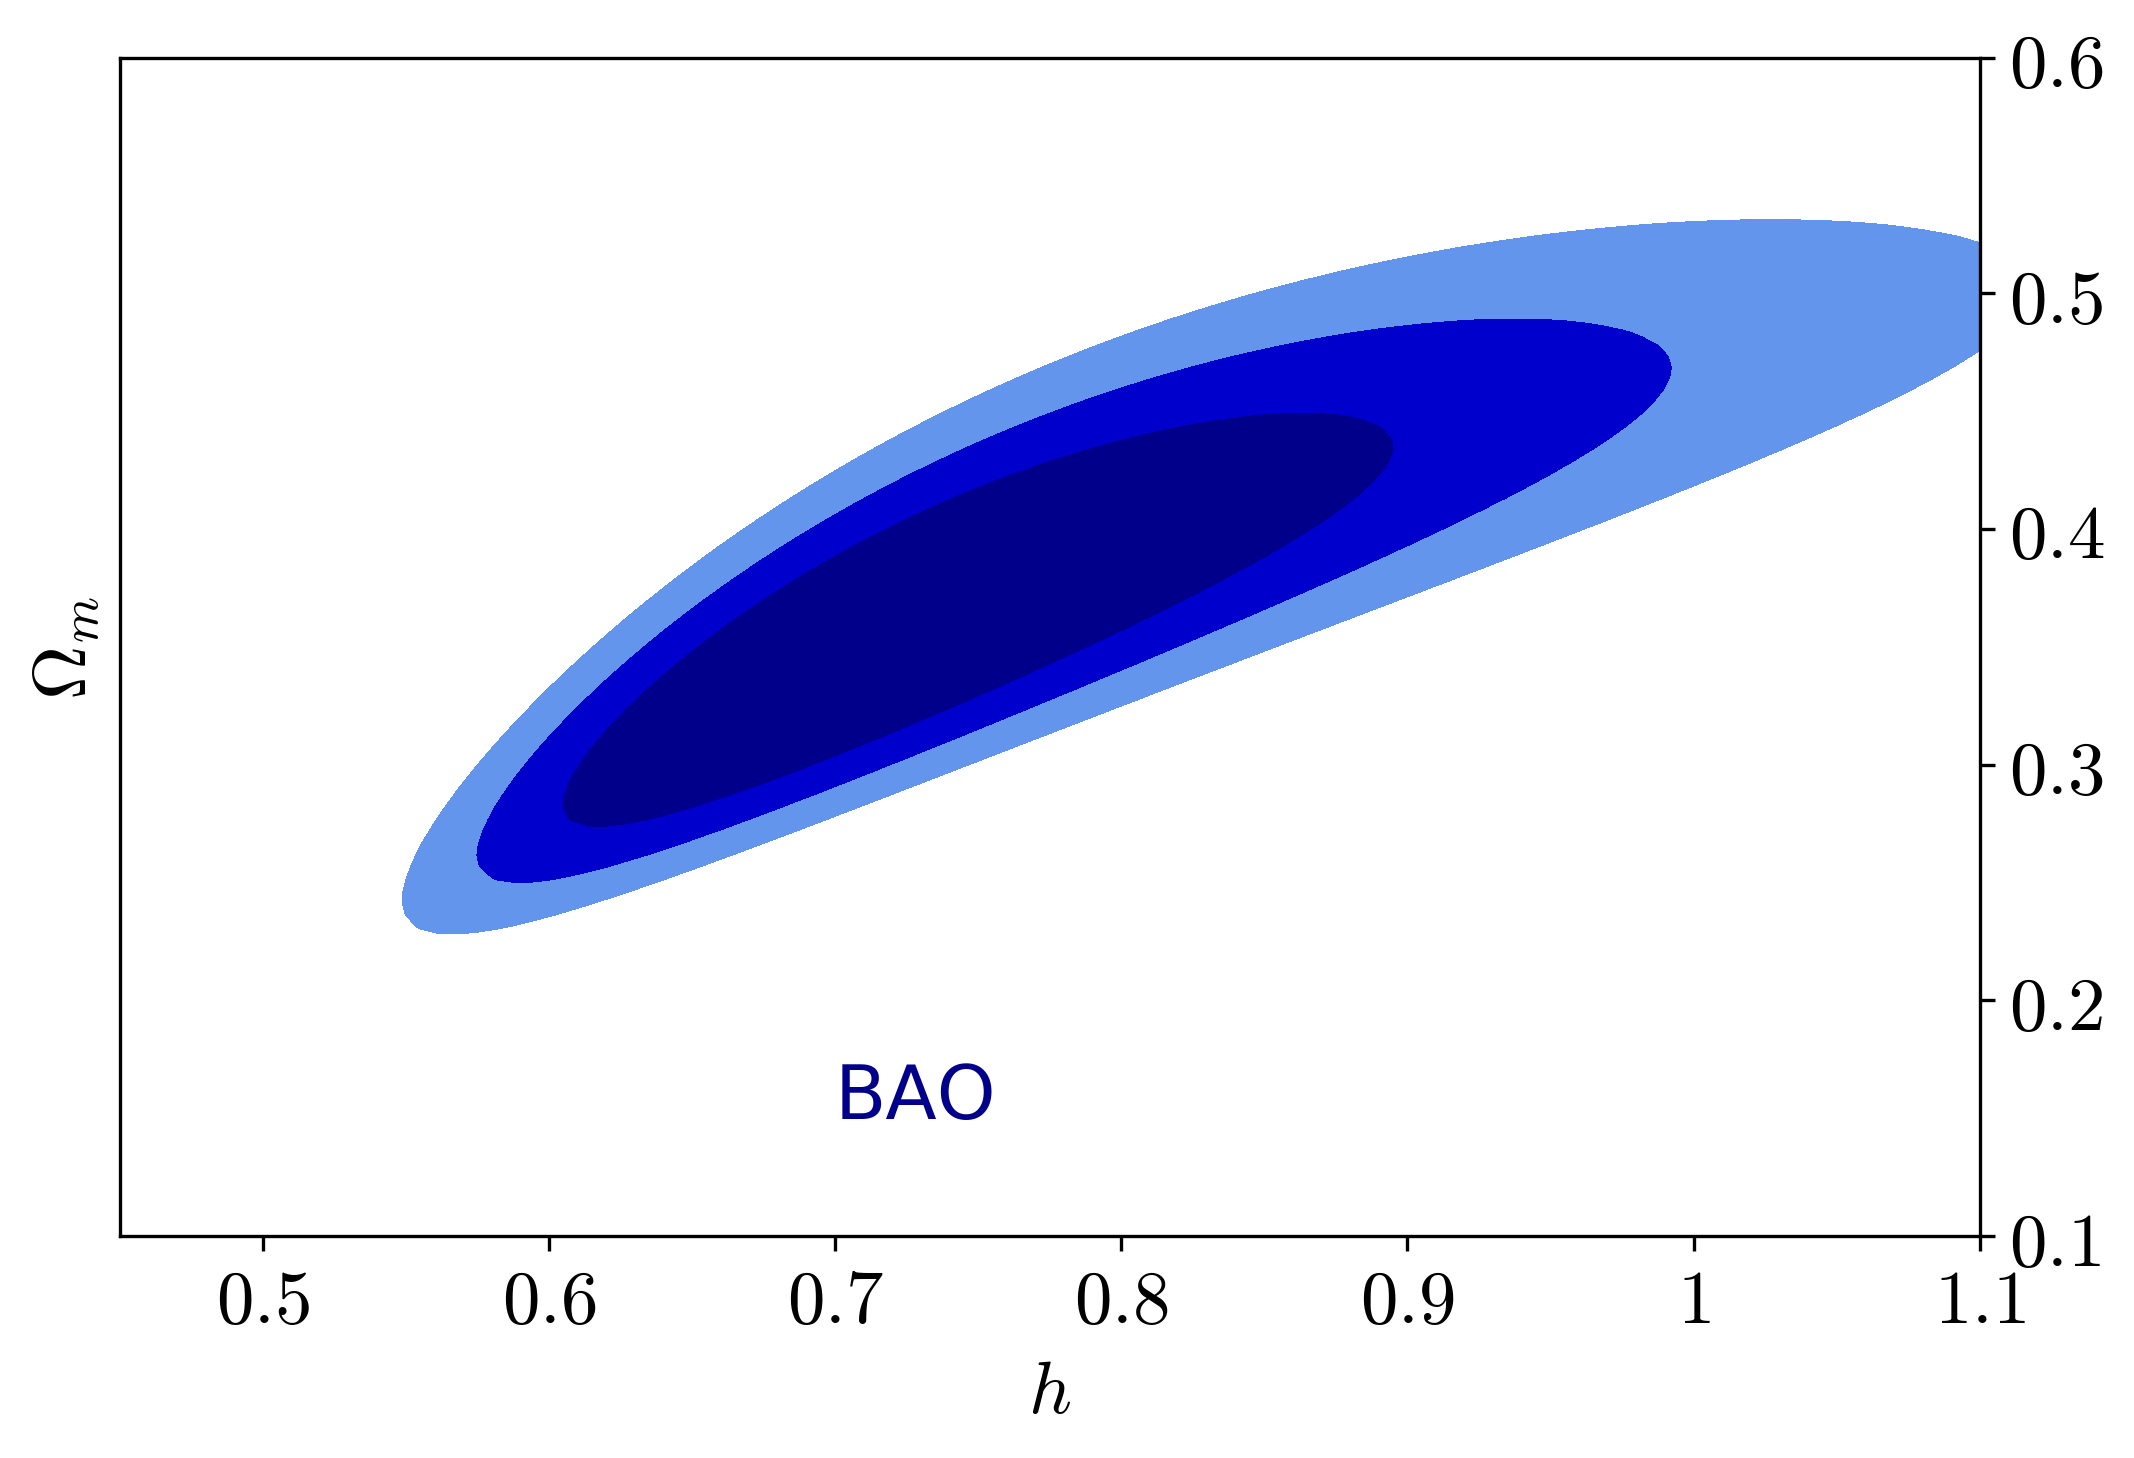

In [37]:
#colors
azul = blues[0], blues[2], blues[3]

chimin = chi2b

s1,s2,s3=chimin+ds1_6,chimin+ds2_6,chimin+ds3_6

with File(baogrid, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    H = data[:,:,4]
    Omega = data[:,:,5]
    Chi2 = chi2data[:,:,0]
    #print(chi2data)
    
    
# Size in inches, and dots per inch
figsize = (8, 8)
dpi = 300

rcParams['font.size'] = 18
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca()
plt.contourf(H, Omega, Chi2, levels =[chimin,s1,s2,s3],
                 #cmap=plt.cm.winter
                 colors = azul
                 )
plt.text(0.7, 0.15, 'BAO', color=blues[0])
xlabel(r'$h$')
ylabel(r'$\Omega_m$')
#colorbar(shrink=1, pad = 0.09)


cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())


############# Second subplot ###############
cax2 = gca()
cax2.yaxis.set_major_formatter(FancyFormatter())


name_fig = 'Contour_h0-OmM_BAO.pdf'
#savefig(path1+name_fig, bbox_inches='tight')
#savefig(path2+name_fig, bbox_inches='tight')
    
    #savefig('./../figures/h-OmegaM_BAO.pdf', bbox_inches='tight')

In [141]:
#w0Omtotgrid

(15.92685382671081, 22.964853826710808, 28.76585382671081, 35.988853826710809)

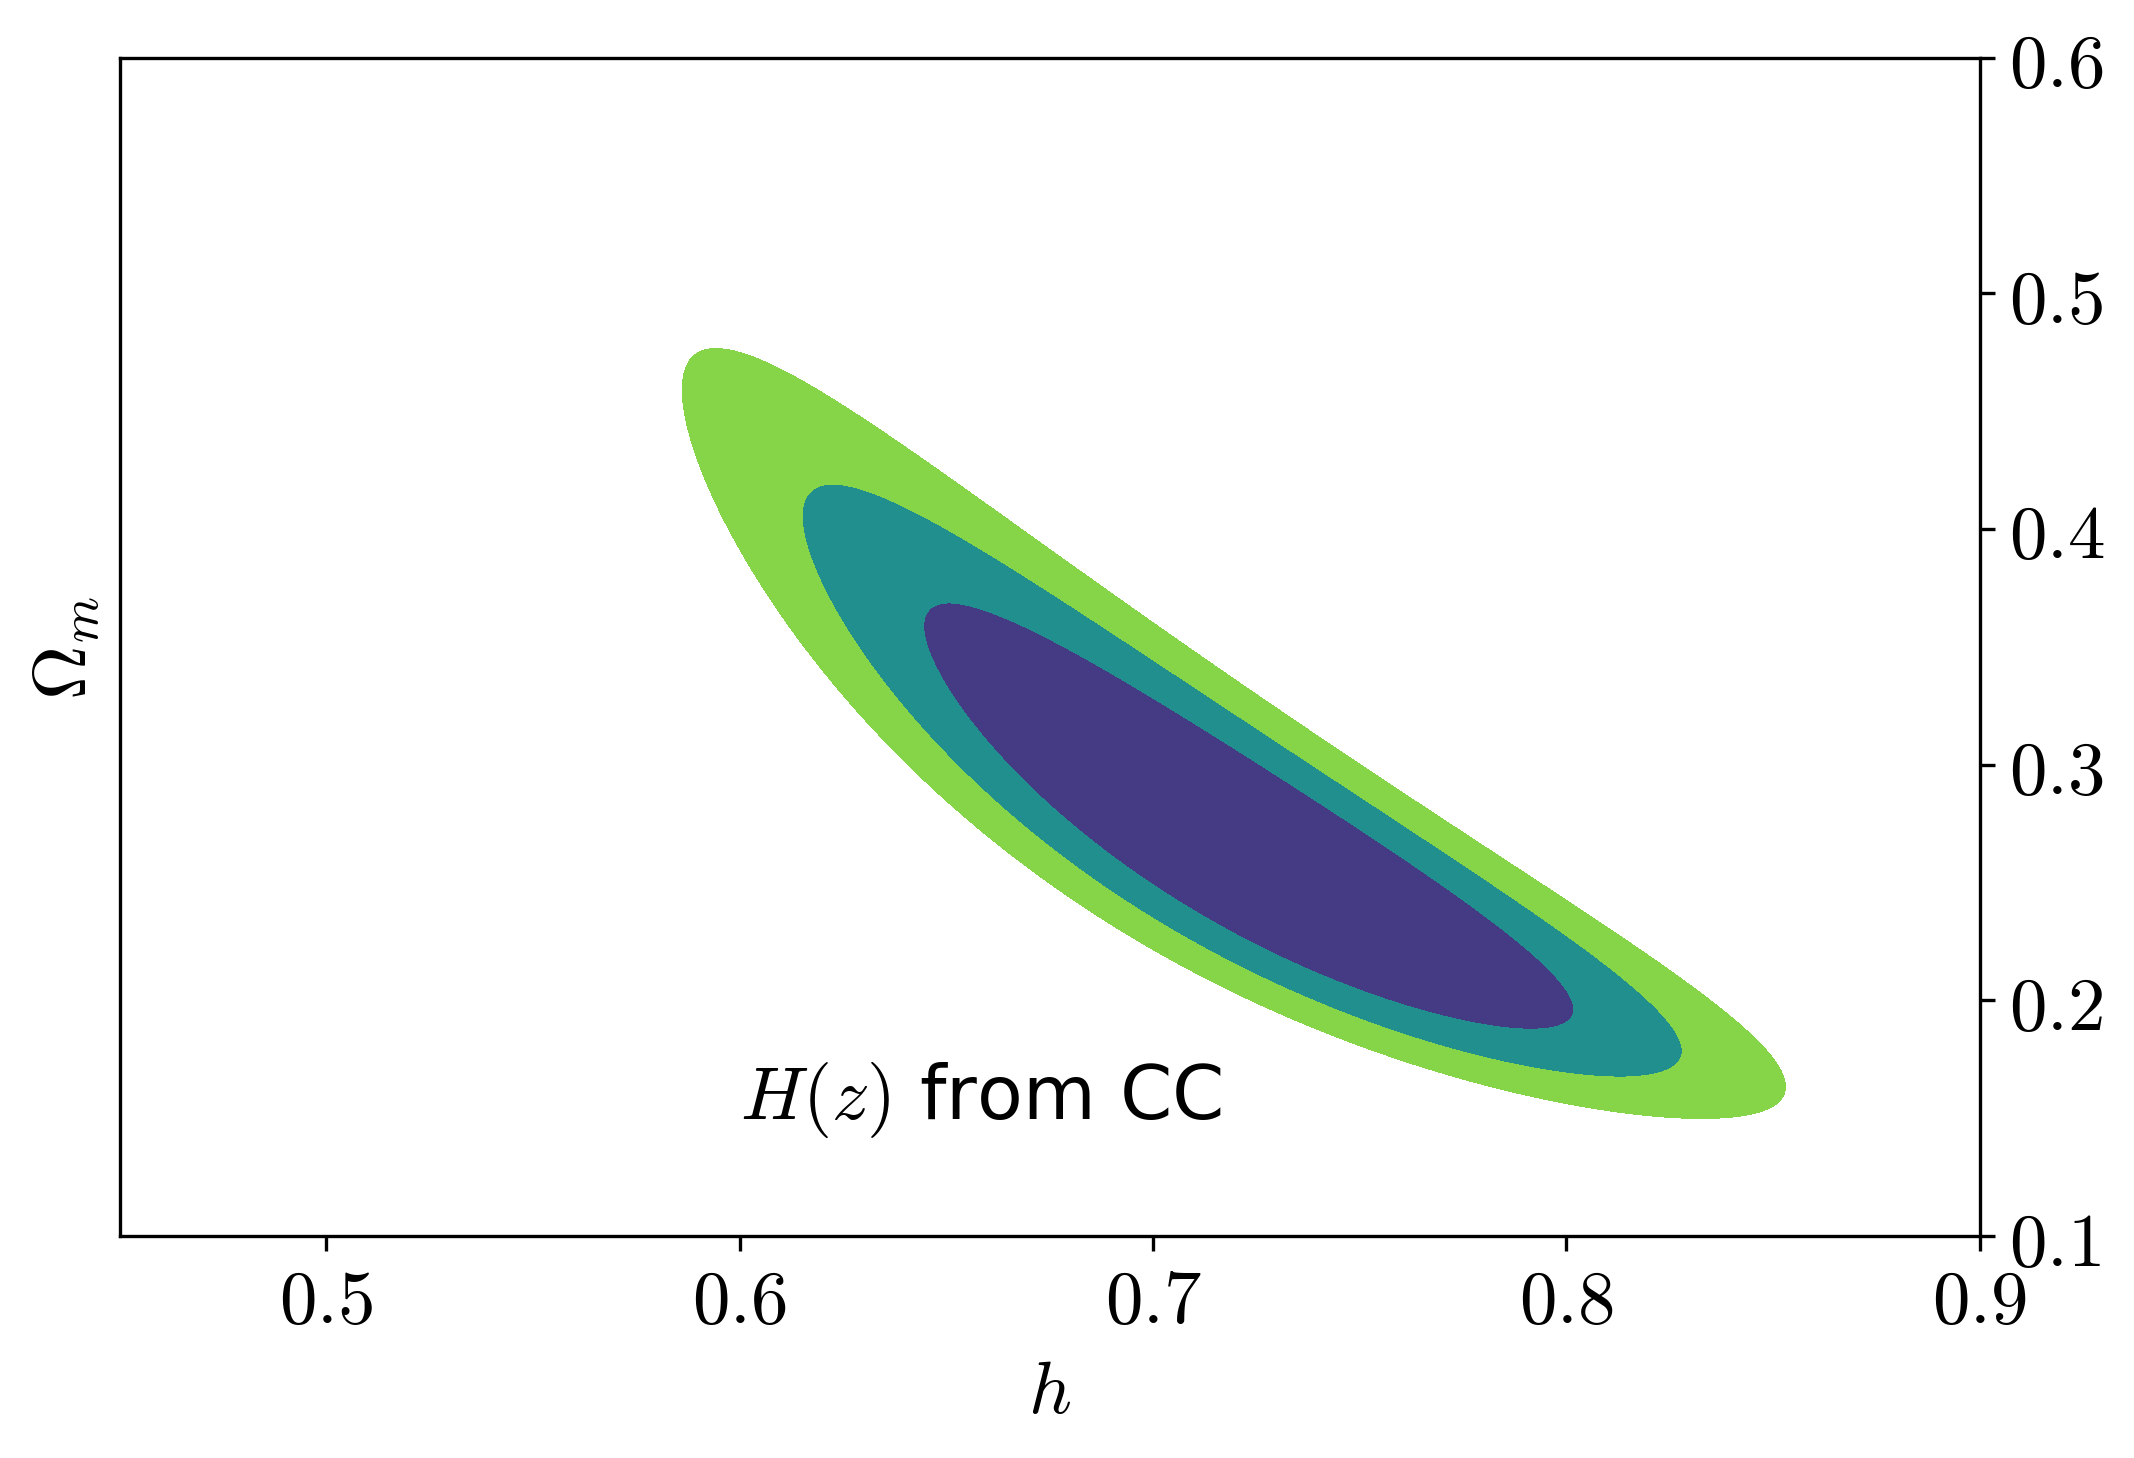

In [52]:
#colors

chimin = chi2h


s1,s2,s3=chimin+ds1_6,chimin+ds2_6,chimin+ds3_6

with File(ccgrid, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    H = data[:,:,4]
    Omega = data[:,:,5]
    Chi2 = chi2data[:,:,0]
    #print(chi2data)
    
figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca() 

plt.contourf(H, Omega, Chi2, levels=[chimin, s1, s2, s3]
            # , 
             #cmap='Greens'
             #colors=greens
            )
#plt.title(r'$log_{10}(\chi^2(h, \Omega_m))$')
plt.text(0.6, 0.15, r'$H(z)$ from CC')
   # plt.axvline(hcc)
    #plt.axhline(ommcc)
    #ylim(0.2, 0.3)
    #xlim(0.7,0.75)
xlabel(r'$h$')
ylabel(r'$\Omega_m$')
clb = plt.colorbar(shrink=1, pad = 0.09)
clb.ax.set_title('$\chi^2$', size=30)



cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())


############# Second subplot ###############
cax2 = gca()
cax2.yaxis.set_major_formatter(FancyFormatter())


name_fig = 'Contour_h0-OmM_CC.pdf'
savefig(path1+name_fig, bbox_inches='tight')
savefig(path2+name_fig, bbox_inches='tight')
    
chimin, chimin+ds1_6, chimin+ds2_6, chimin+ds3_6


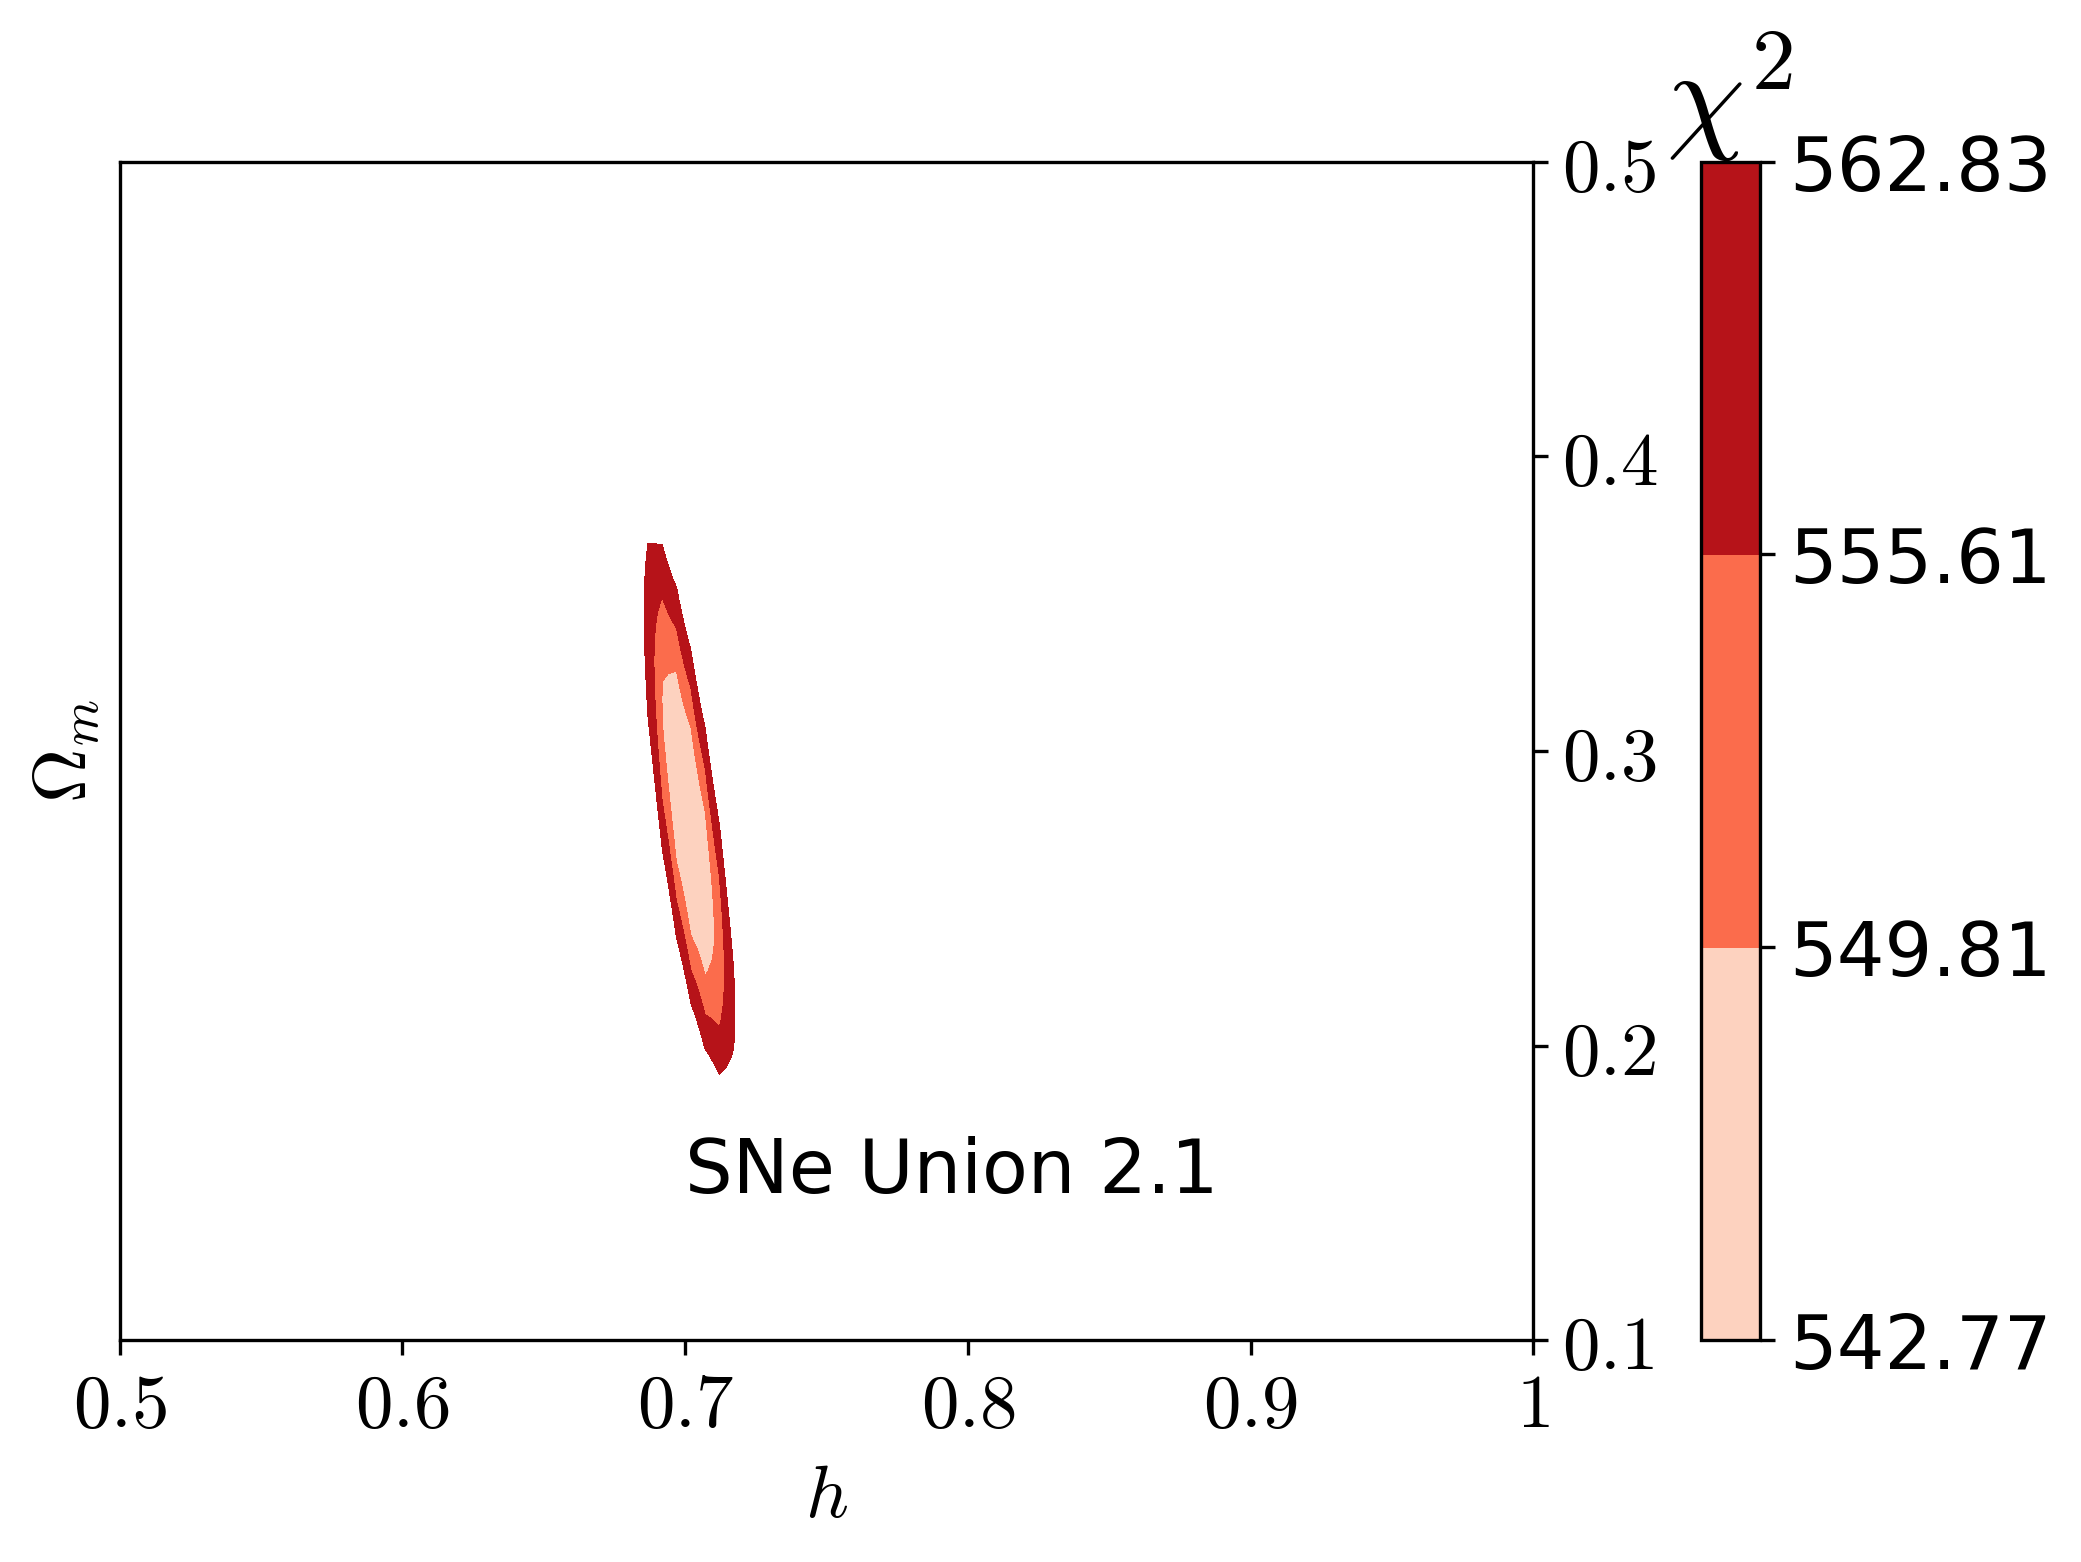

In [79]:
chimin = chi2su

s1,s2,s3=chimin+ds1_6,chimin+ds2_6,chimin+ds3_6

with File(sne21grid, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    H = data[:,:,4]
    Omega = data[:,:,5]
    Chi2 = chi2data[:,:,0]
    #print(chi2data)
    
figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca() 

plt.contourf(H, Omega, Chi2, levels =[chimin,s1,s2,s3],
            cmap='Reds'
             #,
            #colors=reds2
            )
plt.text(0.7, 0.15, 'SNe Union 2.1')
xlabel(r'$h$')
ylabel(r'$\Omega_m$')
#colorbar(shrink=1, pad = 0.09)
clb = plt.colorbar(shrink=1, pad = 0.09)
clb.ax.set_title('$\chi^2$', size=30)

cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())


############# Second subplot ###############
cax2 = gca()
cax2.yaxis.set_major_formatter(FancyFormatter())


name_fig = 'Contour_h0-OmM_SNeU21.pdf'
#savefig(path1+name_fig, bbox_inches='tight')
#savefig(path2+name_fig, bbox_inches='tight')
    

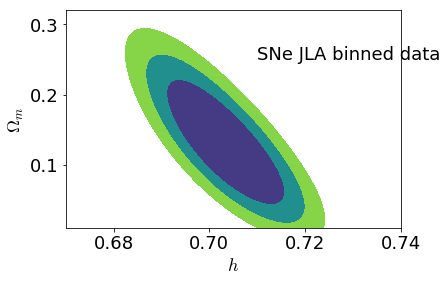

In [46]:
chimin = chi2sj

s1,s2,s3=chimin+ds1_6,chimin+ds2_6,chimin+ds3_6

with File(snejlagrid, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    H = data[:,:,4]
    Omega = data[:,:,5]
    Chi2 = chi2data[:,:,0]
   # print(chi2data)
    plt.contourf(H, Omega, Chi2,levels=[chimin, s1,s2,s3])#, levels=[chimin, s1,s2,s3])#, levels=[chimin, s1, s2, s3])#, levels =[chimin,s1,s2,s3])#, levels =[chimin,s1,s2,s3])
    plt.text(0.71, 0.25, 'SNe JLA binned data')
    xlabel(r'$h$')
    ylabel(r'$\Omega_m$')
    #colorbar()
   # savefig('./../figures/JLAbinned-h-OmegaM-1mill.pdf', bbox_inches='tight')

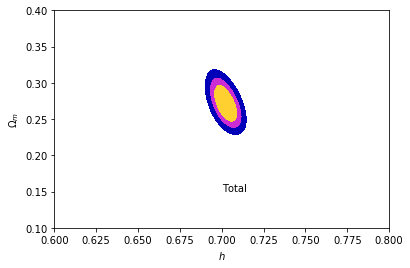

In [15]:
chimin = chi2t

s1,s2,s3=chimin+ds1_6,chimin+ds2_6,chimin+ds3_6

with File(totalgrid, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    H = data[:,:,4]
    Omega = data[:,:,5]
    Chi2 = chi2data[:,:,0]
    #print(chi2data)
    plt.contourf(H, Omega, Chi2, levels =[chimin,s1,s2,s3], cmap='gnuplot2_r')
    plt.text(0.7, 0.15, 'Total')
    xlabel(r'$h$')
    ylabel(r'$\Omega_m$')
    xlim(0.6, 0.8)
    ylim(0.1,0.4)
    #colorbar()
    
    name_fig = 'Contour_h0-OmM_TOTAL.pdf'
    savefig(path1+name_fig, bbox_inches='tight')
    savefig(path2+name_fig, bbox_inches='tight')
    

In [145]:
chi2h, hcc, ommcc

(15.92685382671081, 0.725071355650311, 0.26103798854574312)

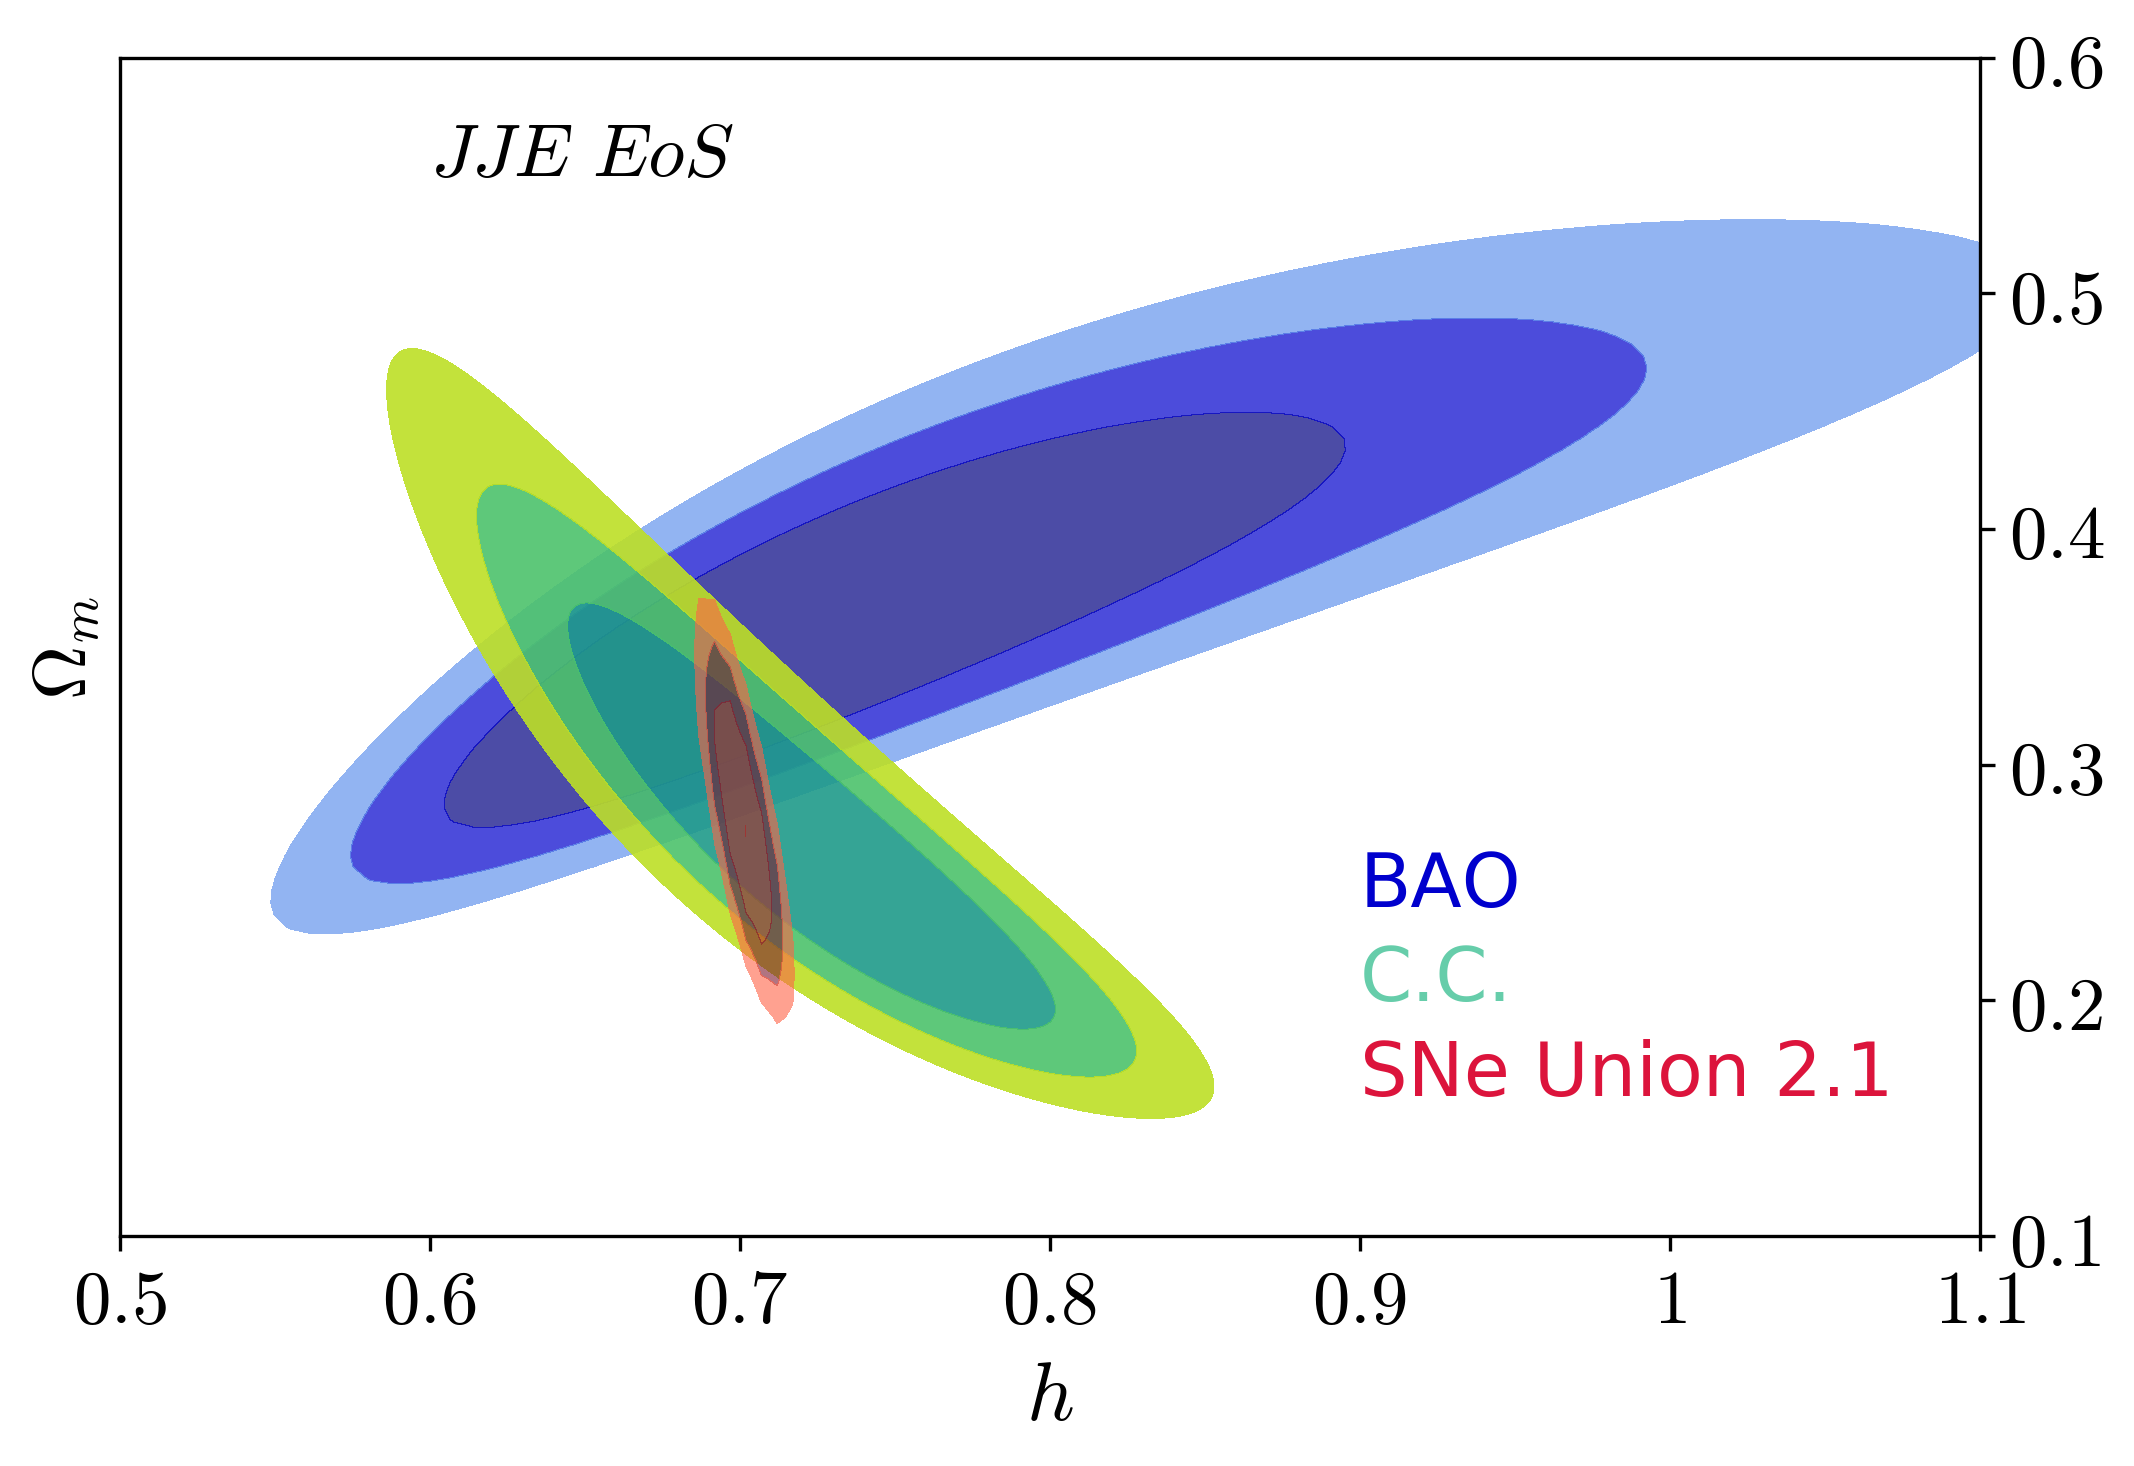

In [12]:
#s1,s2,s3 = chimin + ds1, chimin + ds2, chimin + ds3
ds1, ds2, ds3 = ds1_6, ds2_6, ds3_6
with File(baogrid, 'r') as datafile:
    datab = datafile['/DataGrid'].value
    chi2datab = datafile['/Chi2'].value
    
    Hb = datab[:,:,4]
    OmMb = datab[:,:,5]
    Chi2b = chi2datab[:, :,0]
    #print(Chi2)

#with File(snejlagrid, 'r') as datafile:
with File(sne21grid, 'r') as datafile:
    datas = datafile['/DataGrid'].value
    chi2datas = datafile['/Chi2'].value
    
    Hs = datas[:,:,4]
    OmMs = datas[:,:,5]
    Chi2s = chi2datas[:, :,0]
    
with File(ccgrid, 'r') as datafile:
    datac = datafile['/DataGrid'].value
    chi2datac = datafile['/Chi2'].value
    
    Hc = datac[:,:,4]
    OmMc = datac[:,:,5]
    Chi2c = chi2datac[:, :,0]


##################################    
# Size in inches, and dots per inch
figsize = (8, 8)
dpi = 300

rcParams['font.size'] = 18
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca()

plt.contourf(Hb, OmMb, Chi2b, 
             levels =[0,chi2b, chi2b + ds1, chi2b + ds2, chi2b + ds3],
             alpha=0.7,
             #cmap=plt.cm.Blues
            colors = blues
            )


plt.contourf(Hc, OmMc, Chi2c, 
             levels =[0,chi2h, chi2h + ds1, chi2h + ds2, chi2h + ds3],
             alpha=0.9)



plt.contourf(Hs, OmMs, Chi2s, 
             #levels =[0,chi2sj, chi2sj + ds1, chi2sj + ds2, chi2sj + ds3],
             
             levels =[0,chi2su, chi2su + ds1, chi2su + ds2, chi2su + ds3],
             #cmap=plt.cm.autumn_r,
             colors = reds2,
             alpha =0.6)


text(0.6, 0.55, r'$JJE$ $EoS$')
text(0.9, 0.24,'BAO', color='mediumblue')
text(0.9, 0.20,'C.C.', color='mediumaquamarine')
#text(0.9, 0.16,'SNe JLA', color='crimson')
text(0.9, 0.16,'SNe Union 2.1', color='crimson')

xlim(0.5,1.1)
#ylim(0,np.pi)

xlabel(r'$h$', size=20)
ylabel(r'$\Omega_m$')


cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())


############# Second subplot ###############
cax2 = gca()
cax2.yaxis.set_major_formatter(FancyFormatter())


#cax2.set_xlabel(r'$a$', fontsize=25)
#savefig('./../figures/h-OmegaM_contours-Union21-wgeom.pdf', bbox_inches='tight')

#savefig('./../../../../f_R-Chi2/code-chi2-bao-sneia-shared/figures/h-OmegaM_contours-Union21-wgeom.pdf', bbox_inches='tight')

In [7]:
alphas = [
        [1, 0.5],
        [0.9, 0.6],
        [0.8, 0.7],
        [0.75, 0.6]
    ]



dark_pink = '#800080'
light_pink = '#FFB3FF'

dark_blue = '#003366'
light_blue = '#99CCFF'

dark_orange = '#FF8000'
light_orange = '#FFBF80'

dark_green = '#208000'
light_green = '#C6FFB3'

dark_red = '#CC0000'
light_red = '#DEA6A6'

colors = [

        ['darkblue', 'navy', 'mediumblue','cornflowerblue',
         'steelblue'],
        [dark_orange, light_orange],
        [dark_pink, light_pink],
        [dark_green, light_green],
        ['firebrick', 'firebrick', dark_red, 'tomato']
    ]

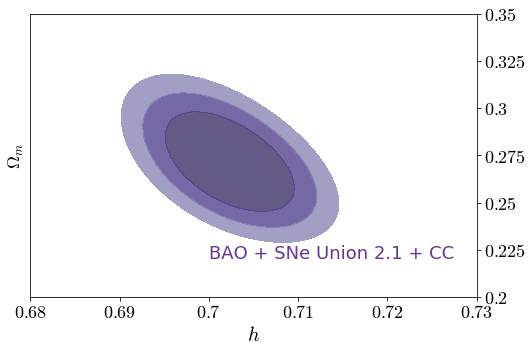

In [31]:
ds1, ds2, ds3 = 7.038, 12.839, 20.062 #6params
chimin = chi2t
s1,s2,s3 = chimin + ds1, chimin + ds2, chimin + ds3

with File(totalgrid, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    
    H = data[:,:,4]
    OmM = data[:,:,5]
    Chi2 = chi2data[:, :,0]
    #print(Chi2)


# Size in inches, and dots per inch
figsize = (8, 8)
dpi = 300

rcParams['font.size'] = 18
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca()
plt.contourf(H, OmM, Chi2, 
             levels =[0,chimin, s1, s2, s3],
             alpha=0.8, 
            colors = purples)
             #cmap=plt.cm.Blues)




#    colorbar()
text(0.7, 0.22, r'BAO + SNe Union 2.1 + CC', color='rebeccapurple')

xlim(0.68,0.73)
ylim(0.2,0.35)

xlabel(r'$h$', size=20)
ylabel(r'$\Omega_m$')
#xlim(0.69, 0.715)

cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

############# Second subplot ###############
cax2 = gca()

cax2.yaxis.set_major_formatter(FancyFormatter())

name_fig = 'h-OmM_TOTAL_Union2-1_contours-wgeom.pdf'
savefig(path1+name_fig, bbox_inches='tight')
savefig(path2+name_fig, bbox_inches='tight')
    
    
#savefig('./../figures/h-OmegaM_TOTAL_Union2-1_contours-wgeom.pdf', bbox_inches='tight')

In [24]:
ht, ommt

(0.70233607171891066, 0.27078373354302343)

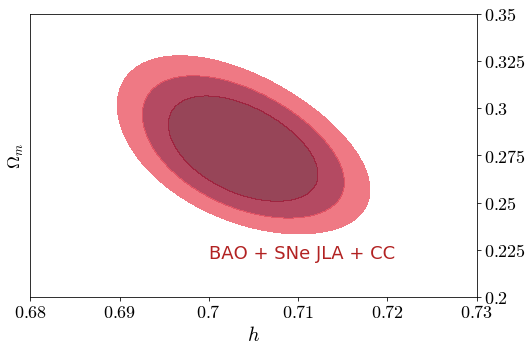

In [32]:
chimin = chi2tj
s1,s2,s3 = chimin + ds1, chimin + ds2, chimin + ds3

with File(totalJLA, 'r') as datafile:
    data = datafile['/DataGrid'].value
    chi2data = datafile['/Chi2'].value
    
    H = data[:,:,4]
    OmM = data[:,:,5]
    Chi2 = chi2data[:, :,0]
    #print(Chi2)


# Size in inches, and dots per inch
figsize = (8, 8)
dpi = 300

rcParams['font.size'] = 18
rcParams['lines.linewidth'] = 2
rcParams['mathtext.fontset'] = 'cm'

figure(figsize=figsize, dpi=dpi)

grid_spec = GridSpec(2, 1, height_ratios=[2, 1])
subplots_adjust(hspace=0.05)

### upper panel
subplot(grid_spec[0])
cax = gca()
plt.contourf(H, OmM, Chi2, 
            levels =[0,chimin, s1, s2, s3],
            alpha=0.8, 
            colors = reds)
             #cmap=plt.cm.Blues)



#colorbar()
text(0.7, 0.22, r'BAO + SNe JLA + CC', color='firebrick')

xlim(0.68,0.73)
ylim(0.2,0.35)

xlabel(r'$h$', size=20)
ylabel(r'$\Omega_m$')
#xlim(0.69, 0.715)

cax.yaxis.set_ticks_position('right') 
cax.yaxis.set_major_formatter(FancyFormatter())
cax.xaxis.set_major_formatter(FancyFormatter())

############# Second subplot ###############
cax2 = gca()

cax2.yaxis.set_major_formatter(FancyFormatter())

cax2.yaxis.set_major_formatter(FancyFormatter())

name_fig = 'h-OmM_TOTAL_JLA_contours-wgeom.pdf'
savefig(path1+name_fig, bbox_inches='tight')
savefig(path2+name_fig, bbox_inches='tight')
#savefig('./../figures/h-OmegaM_TOTAL_contours-JLA-wgeom.pdf', bbox_inches='tight')

In [25]:
BFVpath = './../Output/BFV/'

#totalBFV = BFVpath+'Total/TOTAL-6params-20171104-163023.txt'
totalBFV = BFVpath+'Total/Total-6params-20171113-223947.txt'
#totalJLA = BFVpath+'Total/Total-6params-JLA-20171128-170355.txt'
baoBFV = BFVpath+'BAO/BAO-6params-20171116-120539.txt'
sneBFVu21 = BFVpath+'SNe/SNe_Union2_1-6params-20171114-191728.txt'
sneBFVjla = BFVpath+'SNe/SNe_JLAbinned-6params-20171123-190120.txt'

hzBFV = BFVpath+'Hz/Hz_6params-20171116-202854.txt'

wz0b, chi2b, chi2redb, w0b, w1b, w2b, w3b, hb, ommb, bicb, aicb,mb = np.loadtxt(baoBFV)
wz0su, chi2su, chi2redsu, w0su, w1su, w2su, w3su, hsu, ommsu = np.loadtxt(sneBFVu21)
wz0sj, chi2sj, chi2redsj, w0sj, w1sj, w2sj, w3sj, hsj, ommsj = np.loadtxt(sneBFVjla)
wz0h, chi2h, chi2redh, w0h, w1h, w2h, w3h, hcc, ommcc = np.loadtxt(hzBFV)
wz0t, chi2t, chi2redt, w0t, w1t, w2t, w3t, ht, ommt = np.loadtxt(totalBFV)
wz0tj, chi2tj, chi2redtj, w0tj, w1tj, w2tj, w3tj, htj, ommtj, aicj, bicj = np.loadtxt(totalJLA)

In [28]:
baobfvs = wz0b, w0b, w1b, w2b, w3b, hb, ommb
sne21bfvs = wz0su, w0su, w1su, w2su, w3su, hsu, ommsu
ccbfvs = wz0h, w0h, w1h, w2h, w3h, hcc, ommcc
totalsne21bfvs = wz0t, w0t, w1t, w2t, w3t, ht, ommt

In [8]:
wz0sj, chi2sj, chi2redsj, w0sj, w1sj, w2sj, w3sj, hsj, ommsj

(-0.90640244813155646,
 28.902772005884238,
 1.1561108802353695,
 -1.5,
 7.9669090295155751,
 1.6332352577445757,
 2.5719286987840855,
 0.70346791829290956,
 0.12660892376546068)